Noms i NIU dels integrants:
  - **Nom:** David Morillo Massagué
  - **NIU:** 1666540
  - **Nom:** Adrià Muro Gómez
  - **NIU:** 1665191
  - **Nom:** Lucia Garrido Rosas
  - **NIU:** 1671463

## Llibreries utilitzades

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from dataloader_module import load_data
from metrics_module import metrics
from imblearn.over_sampling import SMOTE
from graphs_module import plot_roc_auc
import pandas as pd
import matplotlib.pyplot as plt
from dataloader_module import extreure_columnes

## Càrrega i pre-processament de les dades

In [2]:
# Càrrega i pre-processament de les dades
datafile = "../data/healthcare-dataset-stroke-data.csv"
X, y = load_data(datafile)

# Dividir les dades en conjunts d'entrenament i prova
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar SMOTE per equilibrar les classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

## Creació i test de XGBoost

Millor threshold: 0.008, Millor score: 1.4528109749068132
Accuracy: 0.6792
Precision: 0.1192
Recall: 0.7736
F1 Score: 0.2065


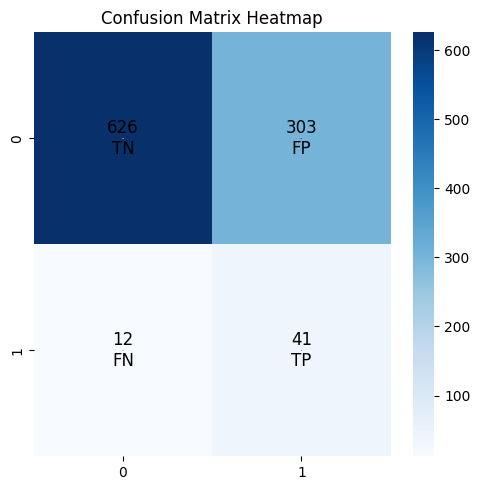

In [3]:
# Entrenar el model XGBoost amb les dades equilibrades
# Crear el model XGBoost
clf = XGBClassifier(eval_metric='logloss')

# Entrenar el model XGBoost amb les dades equilibrades
clf.fit(X_train_resampled, y_train_resampled)
# Generar les probabilitats de predicció
y_proba = clf.predict_proba(X_test)[:, 1]

# Trobar el millor threshold que maximitza l'accuracy i el recall
best_threshold = 0.0
best_score = 0.0

for threshold in np.arange(0.0, 1.0, 0.001):
    y_pred_temp = (y_proba >= threshold).astype(int)
    accuracy_temp, precision_temp, recall_temp, f1_temp, _ = metrics(y_test, y_pred_temp)
    score = accuracy_temp + recall_temp  # Combinar accuracy i recall en un sol score

    if score > best_score:
        best_score = score
        best_threshold = threshold

print(f"Millor threshold: {best_threshold}, Millor score: {best_score}")

# Generar les prediccions amb el millor threshold
y_pred = (y_proba >= best_threshold).astype(int)

# Avaluar el model
accuracy, precision, recall, f1, conf_matrix = metrics(y_test, y_pred, print_metrics=True)

## ROC Curve i AUC

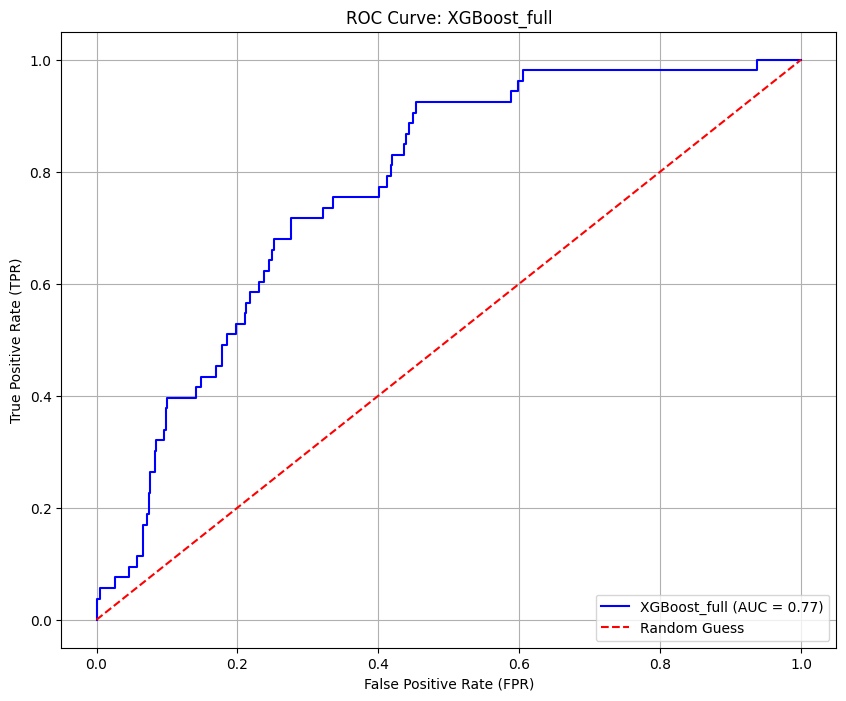

XGBoost_full AUC Score: 0.77


In [4]:
plot_roc_auc(clf, X_train, y_train, X_test, y_test, model_name="XGBoost_full")

## Treiem les caraccterísitques més importants

Millor threshold: 0.011, Millor score: 1.2463205625792568
Accuracy: 0.3218
Precision: 0.0689
Recall: 0.9245
F1 Score: 0.1283


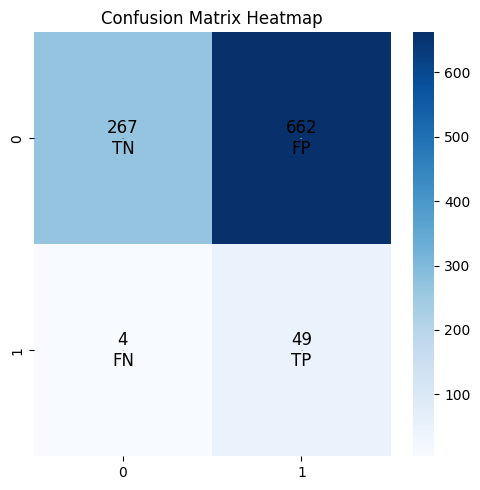

In [5]:
X,y = extreure_columnes(X,y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar SMOTE per equilibrar les classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

clf = XGBClassifier(eval_metric='logloss')

# Entrenar el model XGBoost amb les dades equilibrades
clf.fit(X_train_resampled, y_train_resampled)
# Generar les probabilitats de predicció
y_proba = clf.predict_proba(X_test)[:, 1]

# Trobar el millor threshold que maximitza l'accuracy i el recall
best_threshold = 0.0
best_score = 0.0

for threshold in np.arange(0.0, 1.0, 0.001):
    y_pred_temp = (y_proba >= threshold).astype(int)
    accuracy_temp, precision_temp, recall_temp, f1_temp, _ = metrics(y_test, y_pred_temp)
    score = accuracy_temp + recall_temp  # Combinar accuracy i recall en un sol score

    if score > best_score:
        best_score = score
        best_threshold = threshold

print(f"Millor threshold: {best_threshold}, Millor score: {best_score}")

# Generar les prediccions amb el millor threshold
y_pred = (y_proba >= best_threshold).astype(int)

accuracy, precision, recall, f1, conf_matrix = metrics(y_test, y_pred, print_metrics=True)

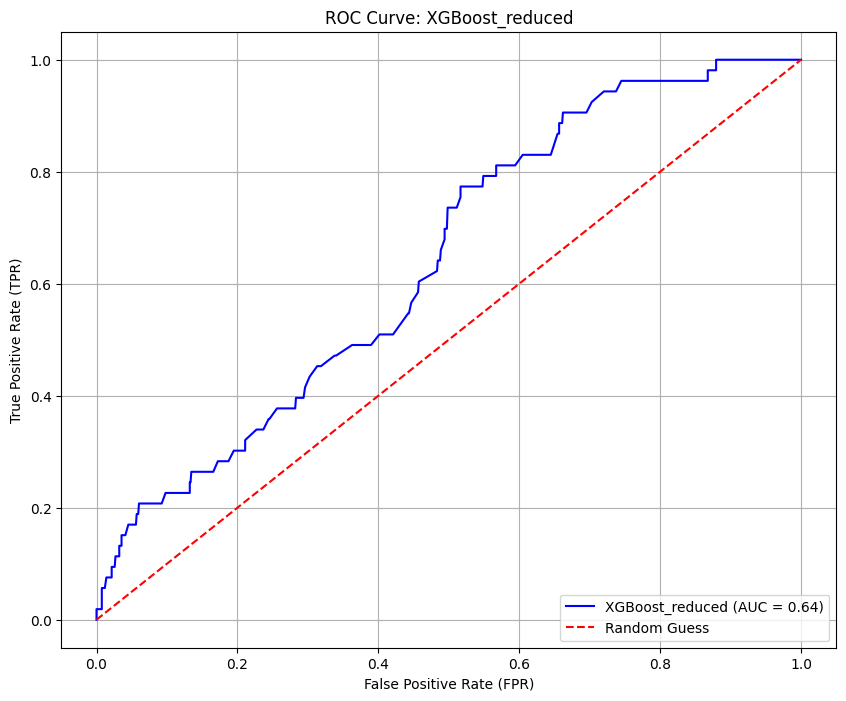

XGBoost_reduced AUC Score: 0.64


In [6]:
plot_roc_auc(clf, X_train, y_train, X_test, y_test, model_name="XGBoost_reduced")